# WDC - English dataset for product matching

# General analysis

In [1]:
import pandas as pd
import json

file_path = r'C:\Users\Kinga\Desktop\iiad_magisterskie\2_sem\NLP\all_gs.json'
data_list = []
with open(file_path, 'r', encoding="utf8") as file:
    for line in file:
        json_data = json.loads(line)
        data_list.append(json_data)

df = pd.json_normalize(data_list)


In [2]:
df.head()

,id_left,category_left,cluster_id_left,identifiers_left,id_right,category_right,cluster_id_right,identifiers_right,label,pair_id,...,keyValuePairs_right.Optical Image Stabilizer,keyValuePairs_right.Aperture Type,keyValuePairs_right.Minimum Aperture,keyValuePairs_right.Max. Diameter,keyValuePairs_right.Standard Accessories,keyValuePairs_right.Grossissement:,keyValuePairs_right.Diamètre:,keyValuePairs_right.Etanchéité:,keyValuePairs_right.Poids en gramme:,keyValuePairs_right.Caractéristique:
0,1861077,Camera_and_Photo,539882,[{'/mpn': '[ahdmc301]'}],7623104,Camera_and_Photo,1343577,"[{'/mpn': '[achom001]'}, {'/gtin13': '[8182790...",0,1861077#7623104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3083228,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",3424944,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",1,3083228#3424944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,403467,Jewelry,625465,"[{'/productID': '[100016654]'}, {'/mpn': '[a11...",14740210,Jewelry,66696,"[{'/productID': '[100016653]'}, {'/mpn': '[a11...",0,403467#14740210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1383359,Shoes,10097862,[{'/mpn': '[819899001]'}],8139158,Shoes,14295887,[{'/mpn': '[852930003]'}],0,1383359#8139158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2677362,Camera_and_Photo,7228103,[{'/sku': '[dcs6045lkt]'}],15923,Camera_and_Photo,262578,[{'/productID': '[818194011852]'}],0,2677362#15923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of o observations in each category and label

A simple plot providing infomation about observation coount in each category and with each label. Label '0' means that the paired products are not similar, label '1' means that the paired products are very similar or the same.

In [3]:
plot_df = df[['category_left', 'label']]

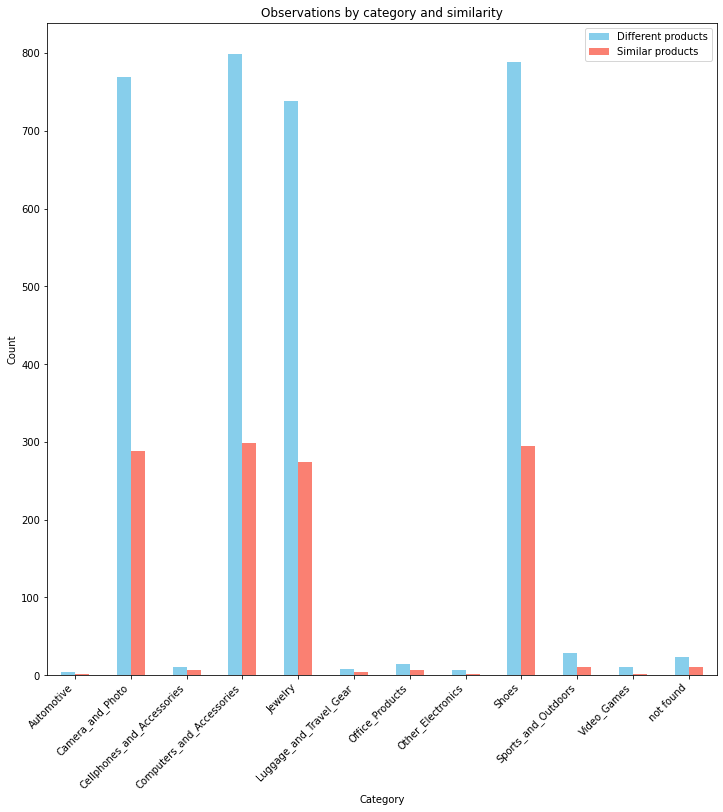

In [4]:
import matplotlib.pyplot as plt

grouped_data = plot_df.groupby(['category_left', 'label']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 12))

grouped_data.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Observations by category and similarity')
plt.xticks(rotation=45, ha='right')  
ax.legend(['Different products', 'Similar products'])


Significant differences between values in colums starting with 'keyValue Pairs 'within the categories resulted in ridiculous number of columns (over 2000). Because of that it was decided to drop these columns for the EDA task.

In [5]:
columns_to_drop = [col for col in df.columns if col.startswith('keyValuePairs')]
df = df.drop(columns=columns_to_drop)

In [6]:
df_cam = df[df['category_left'] == 'Camera_and_Photo']
df_com = df[df['category_left'] == 'Computers_and_Accessories']
df_jew = df[df['category_left'] == 'Jewelry']
df_sh = df[df['category_left'] == 'Shoes']

### Missing values analysis

Plot showing the nuber o missing values in each column in the dataset.

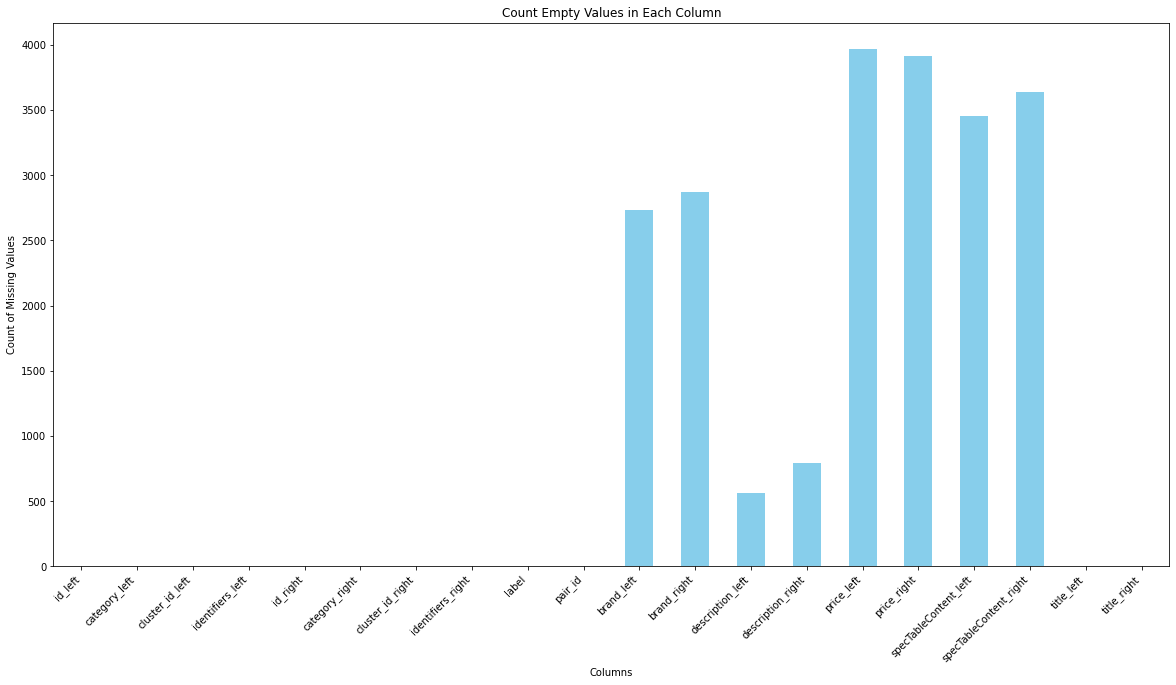

In [8]:
missing_values_count = df.isnull().sum() + (df == '').sum()

fig, ax = plt.subplots(figsize=(20, 10))
missing_values_count.plot(kind='bar', color='skyblue', ax=ax)

plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')  
plt.title('Count Empty Values in Each Column')
plt.show()

Four plots showing the nuber o missing values in each column in the dataset with additional division into categories (cameras, computers, jewerly, shoes).

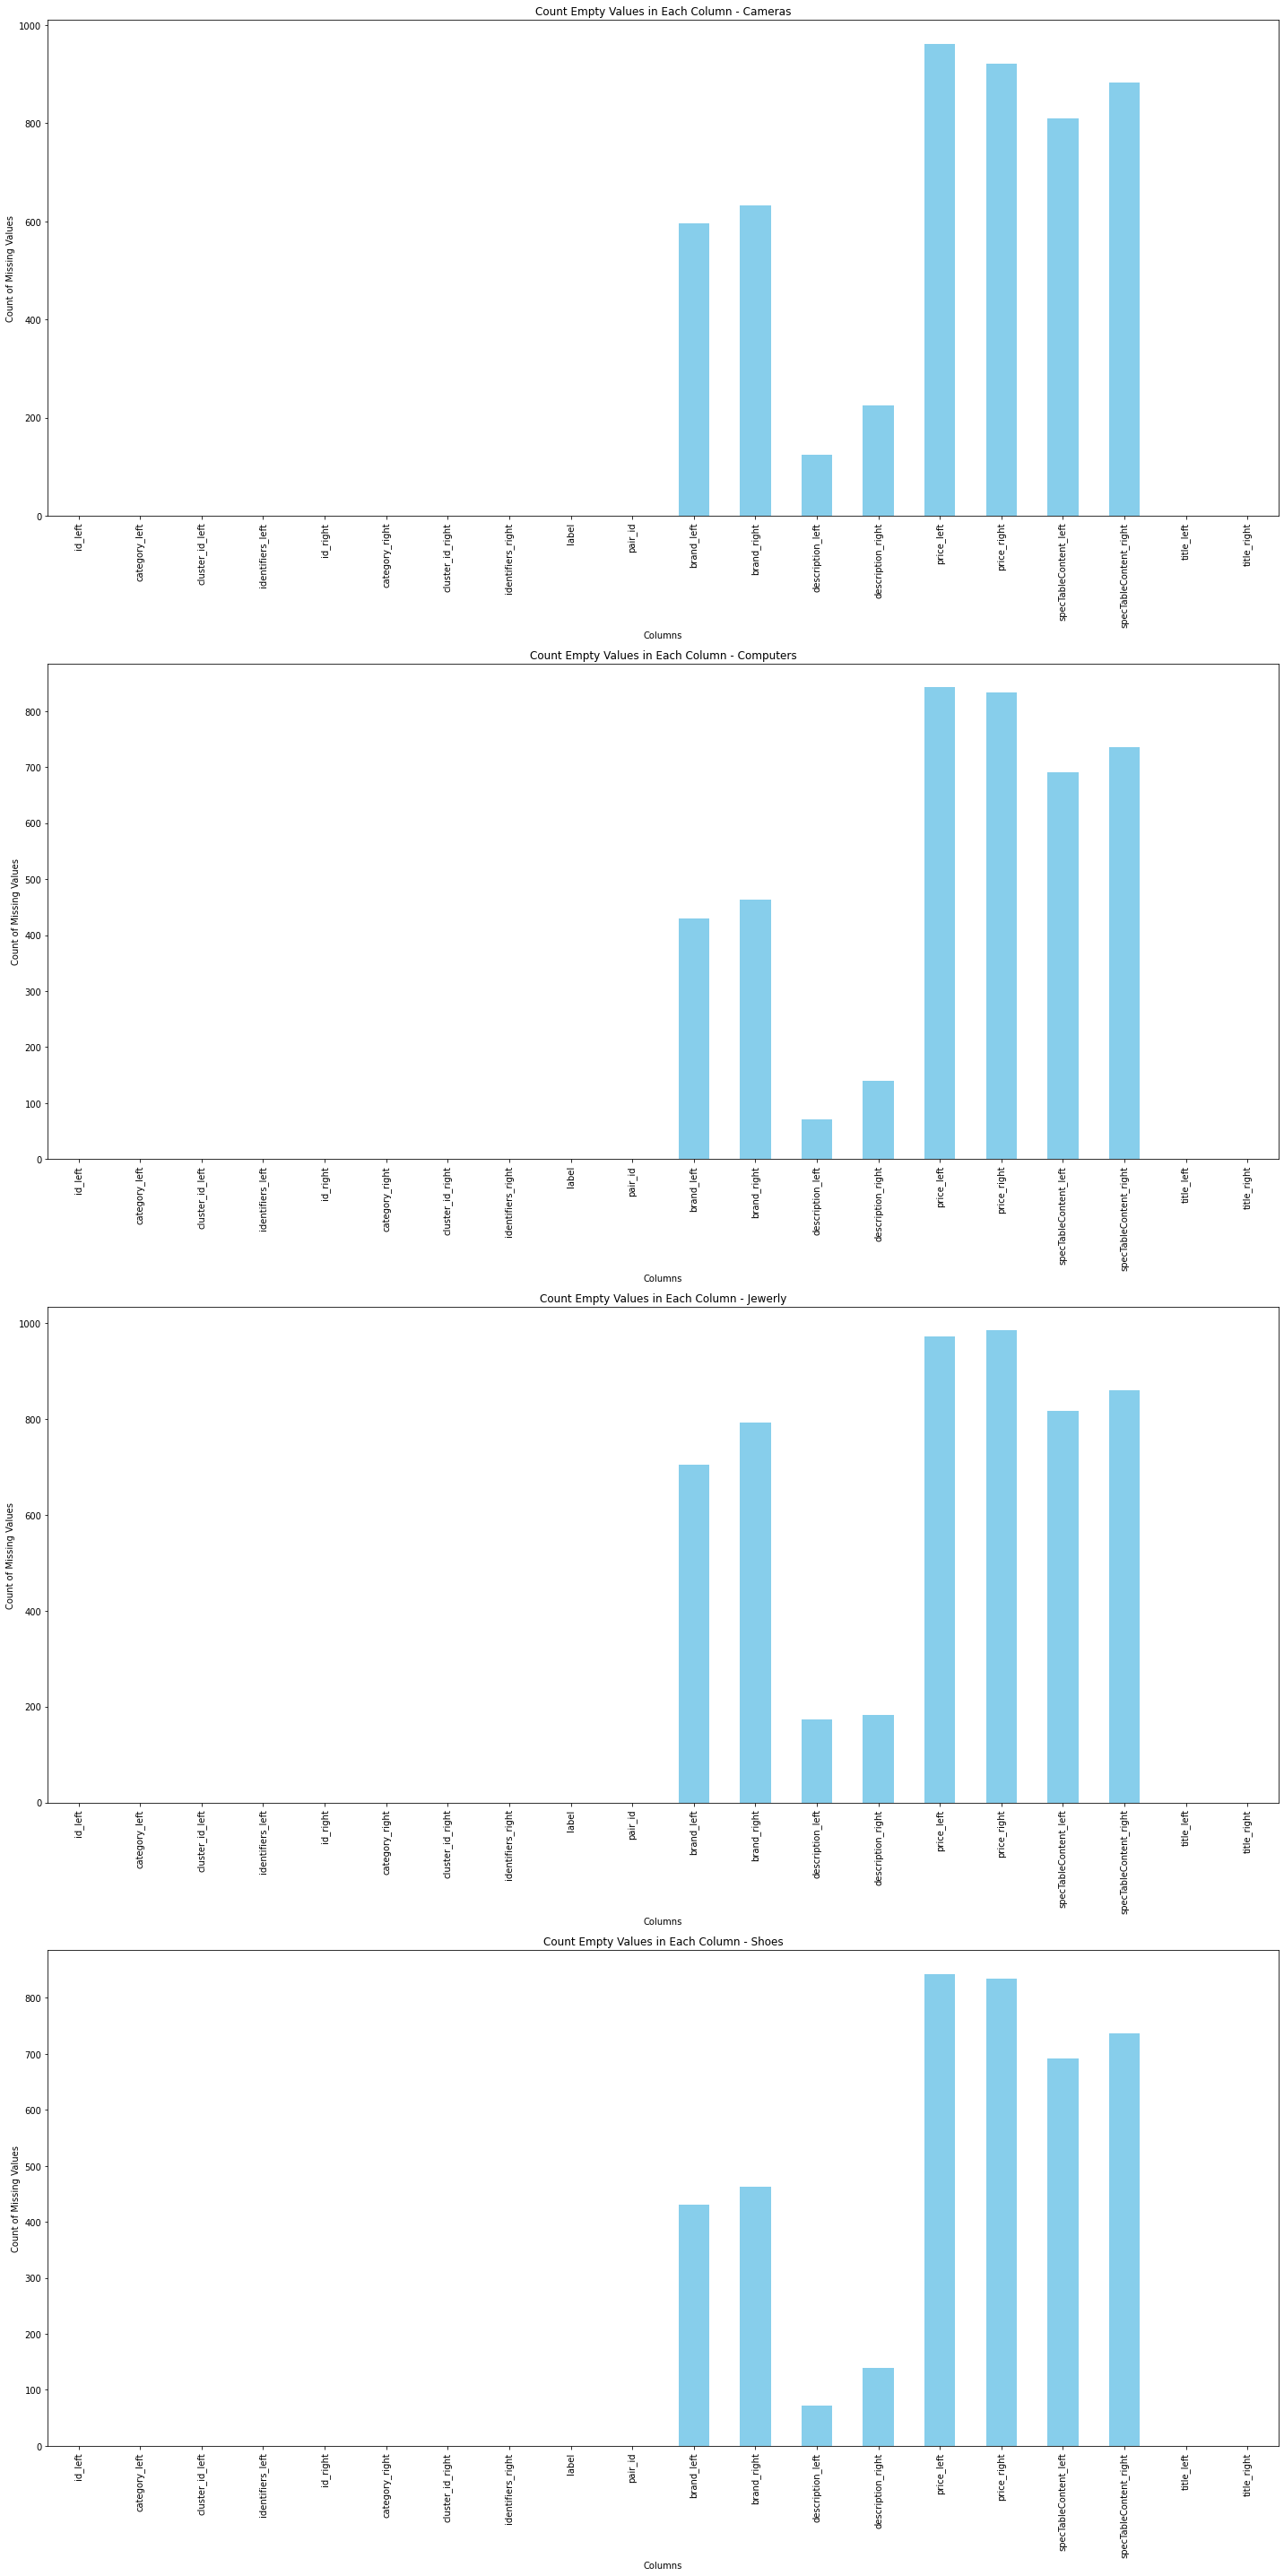

In [7]:
missing_values_count_df1 = df_cam.isnull().sum() + (df_cam == '').sum()
missing_values_count_df2 = df_com.isnull().sum() + (df_com == '').sum()
missing_values_count_df3 = df_jew.isnull().sum() + (df_jew == '').sum()
missing_values_count_df4 = df_sh.isnull().sum() + (df_sh == '').sum()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 40))

missing_values_count_df1.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Count Empty Values in Each Column - Cameras')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Count of Missing Values')
missing_values_count_df2.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Count Empty Values in Each Column - Computers')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Count of Missing Values')

missing_values_count_df3.plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Count Empty Values in Each Column - Jewerly')
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Count of Missing Values')

missing_values_count_df2.plot(kind='bar', color='skyblue', ax=axes[3])
axes[3].set_title('Count Empty Values in Each Column - Shoes')
axes[3].set_xlabel('Columns')
axes[3].set_ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()

Four plots presented on one figure for comparision showing the nuber o missing values in each column in the dataset with additional division into categories (cameras, computers, jewerly, shoes).

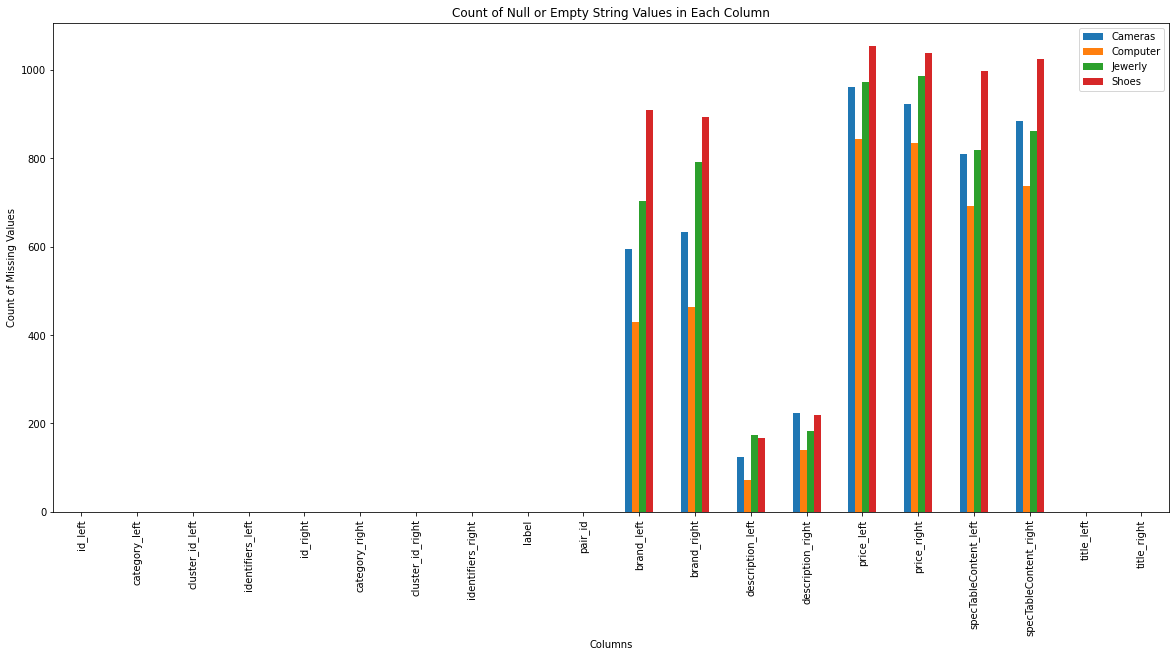

In [ ]:
missing_values_counts_combined = pd.concat([missing_values_count_df1, missing_values_count_df2, missing_values_count_df3, missing_values_count_df4], axis=1, keys=['Cameras', 'Computer', 'Jewerly', 'Shoes'])

fig, ax = plt.subplots(figsize=(20, 9))
missing_values_counts_combined.plot(kind='bar', ax=ax)
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of Missing Values')
plt.title('Count of EmptyValues in Each Column')
plt.show()

# Unpairing the observations

For next analysis the observation were 'unpaired' - left product was separated from the right, the two dataframes undergo column names unification, got concatenated with each other and as the last step, only inque ids were chosen. It was done to achieve dataset with singular products, not pairs. 

In [9]:
df_left = df.filter(like='left')
df_right = df.filter(like='right')
df_left.columns = df_left.columns.str.replace('_left', '')
df_right.columns = df_right.columns.str.replace('_right', '')
merged_df = pd.concat([df_left, df_right])
merged_df = merged_df.drop_duplicates(subset='id', keep='first')
merged_df.head()

,id,category,cluster_id,identifiers,brand,description,price,specTableContent,title
0,1861077,Camera_and_Photo,539882,[{'/mpn': '[ahdmc301]'}],"""GoPro""@en","""\nAllows you to plug your HERO3 camera into y...",None,None,"""GoPro HDMI Cable""@en Cable AHDMC-301 - Filmt..."
1,3083228,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...","""Benq""","""\n More>>>\n \n...",None,None,"""Benq ZOWIE RL2455 24"" Full HD TN Grey comput..."
2,403467,Jewelry,625465,"[{'/productID': '[100016654]'}, {'/mpn': '[a11...",None,None,None,None,""" Mens Nixon The Crew Watch A1186-001 ""Men's ..."
3,1383359,Shoes,10097862,[{'/mpn': '[819899001]'}],None,"""\n The Met...",None,None,"""Nike Metcon 2 - Black/White/Wolf Grey/Volt""@..."
4,2677362,Camera_and_Photo,7228103,[{'/sku': '[dcs6045lkt]'}],None,"""\n The DCS-6045LKT PowerLine HD ...",None,None,"""PowerLine HD Day Night Cloud Camera Kit""@hu ..."


### Analysing title lengths

Simple histogram showing the distribution of titles length (in words).

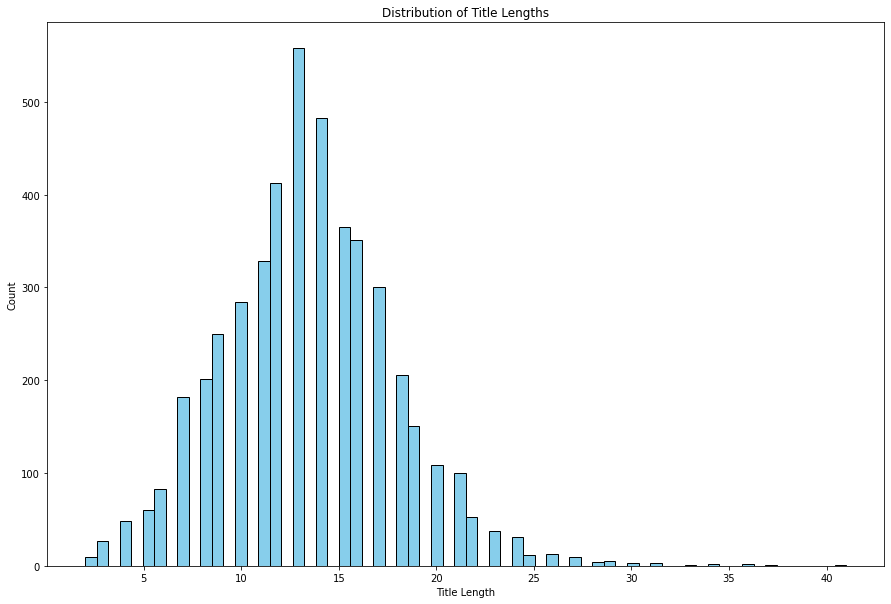

In [10]:
# df['title_length'] = df['title'].apply(len)
plt.figure(figsize=(15, 10))
plt.hist(merged_df['title'].str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.title('Distribution of Title Lengths')
plt.show()

### Analysing description lengths

Simple histogram showing the distribution of description length (in words).

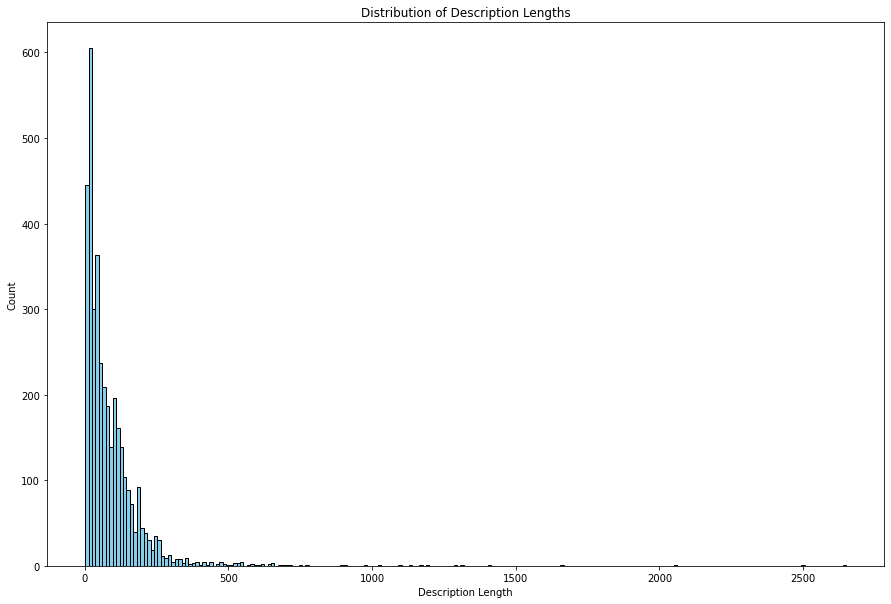

In [11]:
# df['title_length'] = df['title'].apply(len)
descrps = merged_df['description']
descrps = [i for i in descrps if i is not None]
descrps = pd.DataFrame(descrps).squeeze()
plt.figure(figsize=(15, 10))
plt.hist(descrps.str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Distribution of Description Lengths')
plt.show()

In [12]:
df = df.drop(columns=['identifiers_left', 'identifiers_right'])

### Amount of information carried by each variable - average length 

As the idea for trying to measure amount of infornation carried by each variable, the value of avarage length (in words) of the columns content was proposed. This metric may seem a bit naive, but it is just an idea for the first experiments with the data.

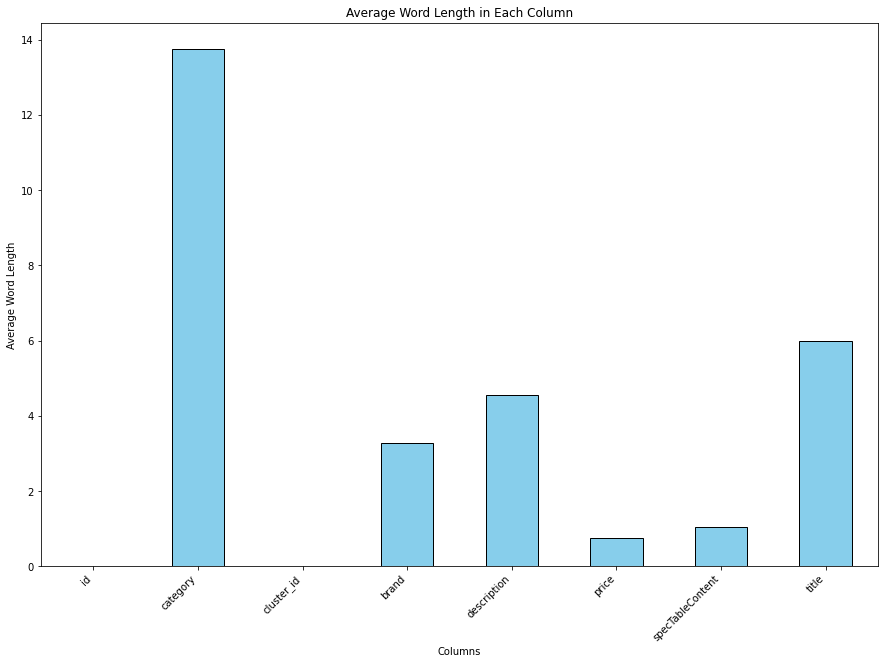

In [ ]:
#średnia dlugosc wartosci w tej kolumnie

def average_word_length(value):
    if pd.notna(value)  and isinstance(value, str):
        words = value.split()
        return sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    return 0

average_lengths = merged_df.applymap(average_word_length).mean()

plt.figure(figsize=(15, 10))
average_lengths.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Columns')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45, ha='right')
plt.title('Average Word Length in Each Column')

plt.show()

In [13]:
merged_cam = merged_df[merged_df['category'] == 'Camera_and_Photo']
merged_com = merged_df[merged_df['category'] == 'Computers_and_Accessories']
merged_jew = merged_df[merged_df['category'] == 'Jewelry']
merged_sh = merged_df[merged_df['category'] == 'Shoes']

### Analysing the words in titles

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(text, title='Cloud'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

    plt.figure(figsize=(18, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(title)

    plt.show()

#### Cameras

A simple, fun visualisation of cloud of words for the products titles.

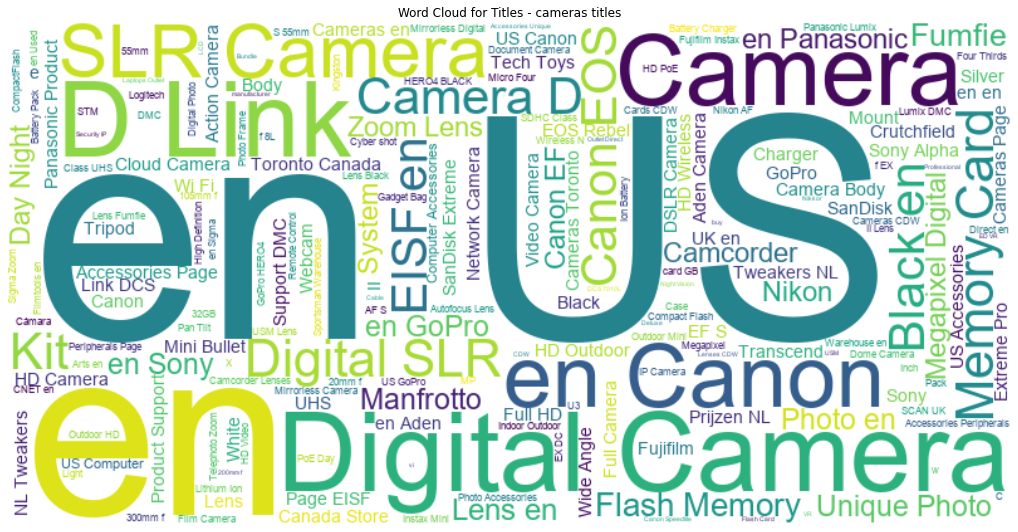

In [19]:
text = ' '.join(merged_cam['title'].astype(str))
plot_cloud(text, 'Word Cloud for Titles - cameras titles')

A barchart showing the number of occurences of each word in all of the titles. For clarity, words thats occured less than the set number of times (*thres* argument) and word with length 1 were filtered out.

In [16]:
from collections import Counter

def plot_word_count(text, thres, title):

    words = text.split()
    word_counts = Counter(words)
    filtered_word_counts = {word: count for word, count in word_counts.items() if count >= thres and len(word) > 1}

    sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
    words_to_plot = list(sorted_word_counts.keys())
    counts_to_plot = list(sorted_word_counts.values())

    plt.figure(figsize=(18, 10))
    plt.bar(words_to_plot, counts_to_plot, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()

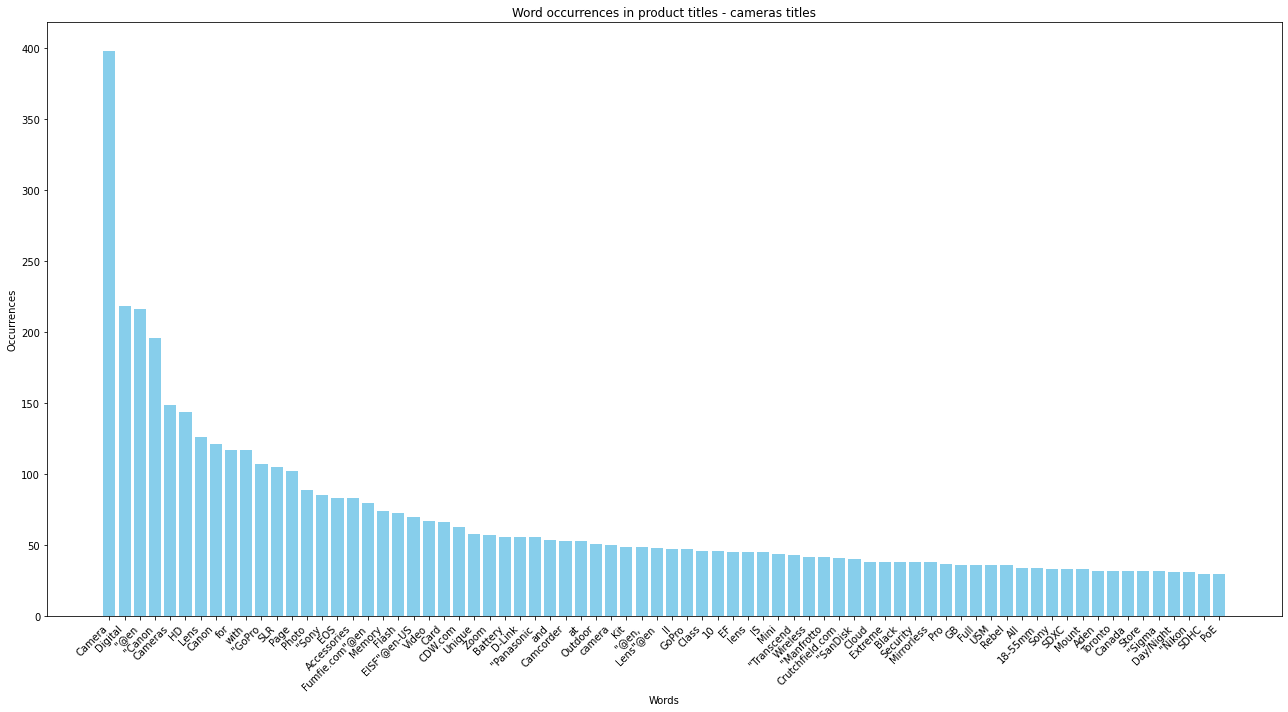

In [20]:
plot_word_count(text, 30, 'Word occurrences in product titles - cameras titles')

The same two visualation as the above were run on the *omputers*, *jewerly* and *shoes* category.

#### Computers

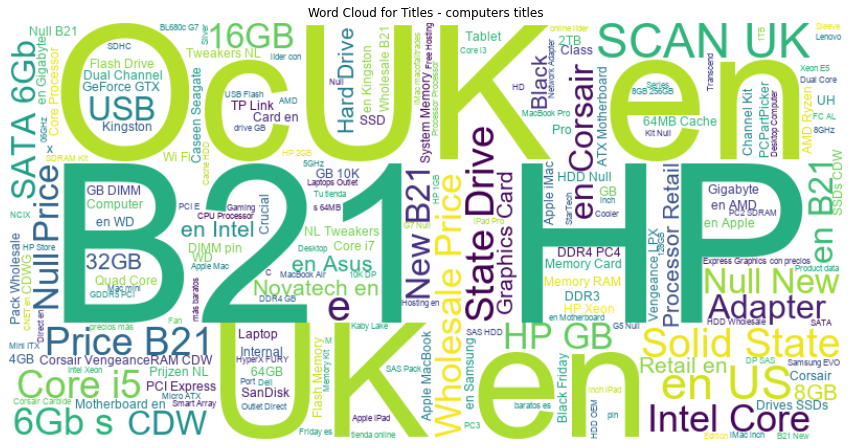

In [ ]:
text = ' '.join(merged_com['title'].astype(str))
plot_cloud(text, 'Word Cloud for Titles - computers titles')

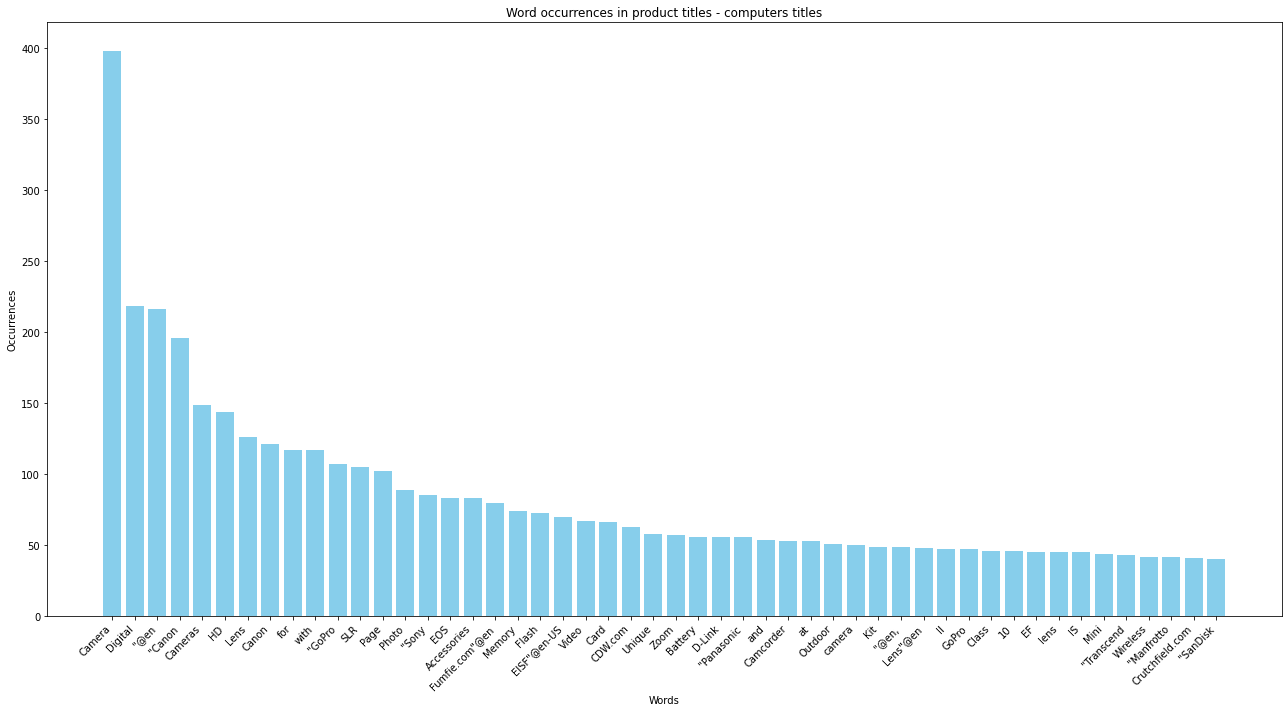

In [21]:
plot_word_count(text, 40, 'Word occurrences in product titles - computers titles')

#### Jewerly

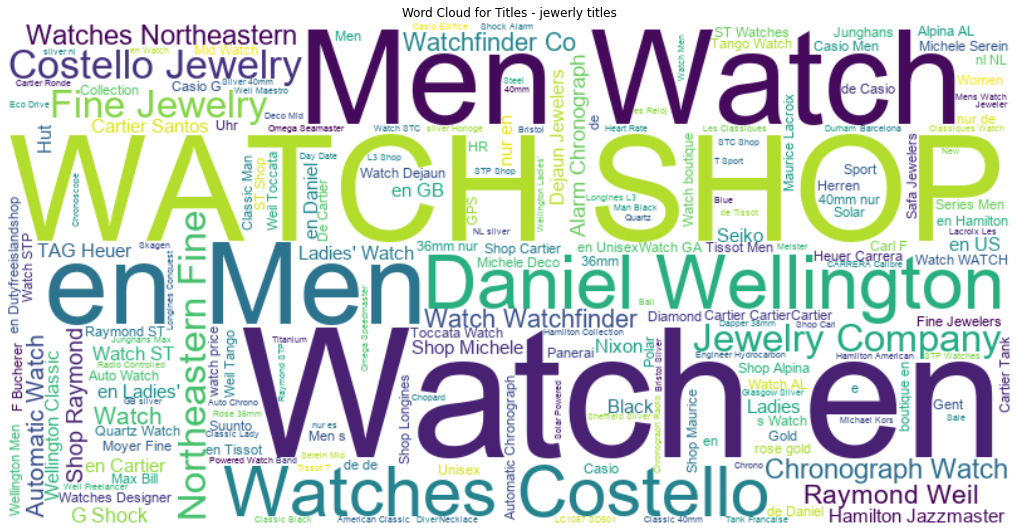

In [22]:
text = ' '.join(merged_jew['title'].astype(str))
plot_cloud(text, 'Word Cloud for Titles - jewerly titles')

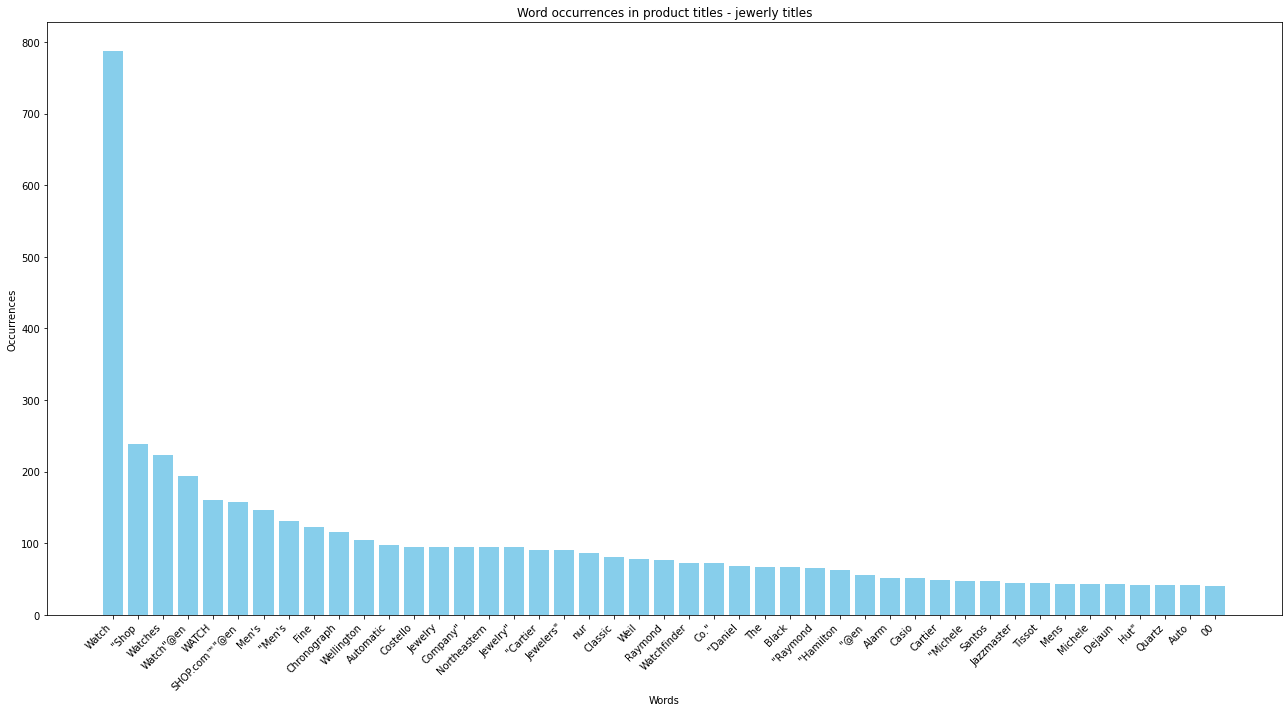

In [23]:
plot_word_count(text, 40, 'Word occurrences in product titles - jewerly titles')

#### Shoes

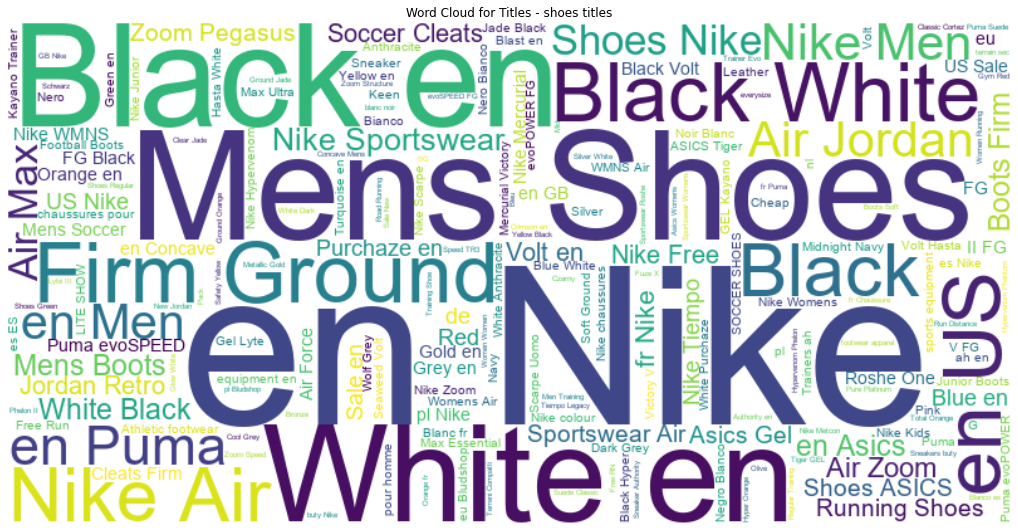

In [24]:
text = ' '.join(merged_sh['title'].astype(str))
plot_cloud(text, 'Word Cloud for Titles - shoes titles')

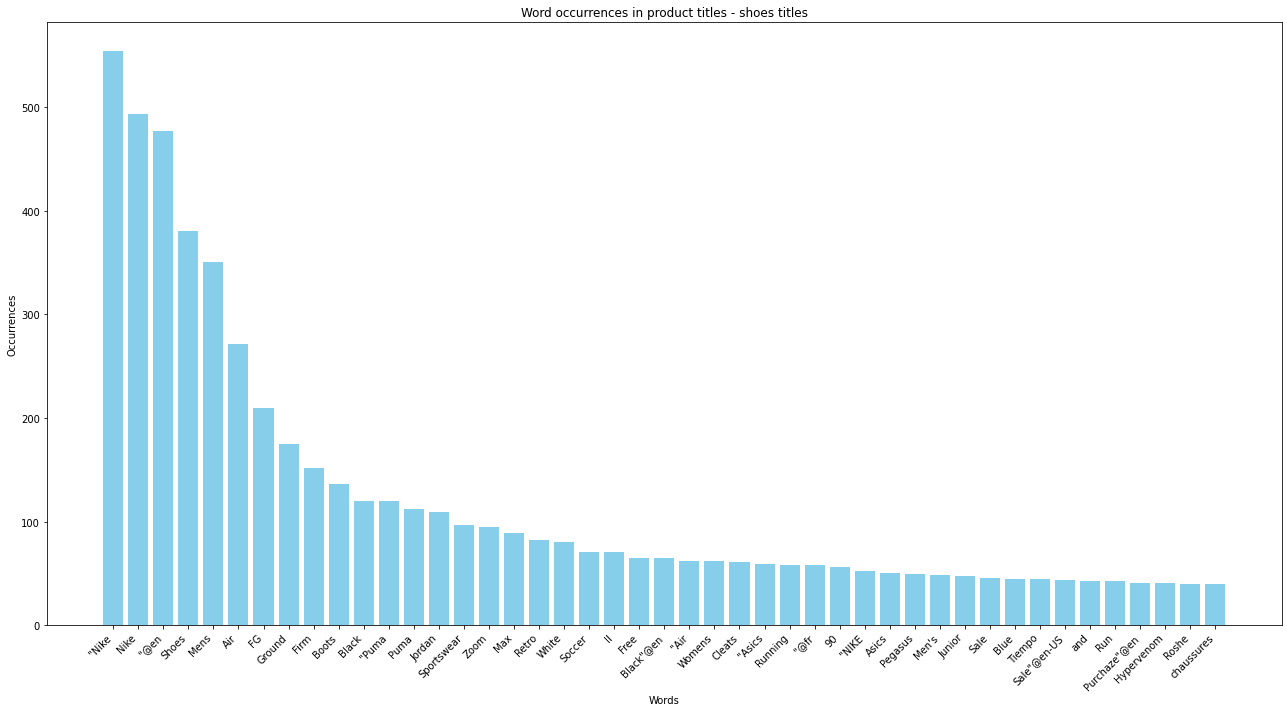

In [25]:
plot_word_count(text, 40, 'Word occurrences in product titles - shoes titles')

### Analysing the words in description

The same plot as the one above (occurences of each word in all titles) was created for descriptions in both categories.

In [28]:
from collections import Counter

def plot_occurences_in_description(df, category):  
    text = ' '.join(df['description'].astype(str))
    words = text.split()
    word_counts = Counter(words)
    filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 100 and len(word) > 3}

    sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
    words_to_plot = list(sorted_word_counts.keys())
    counts_to_plot = list(sorted_word_counts.values())

    plt.figure(figsize=(18, 10))
    plt.bar(words_to_plot, counts_to_plot, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(f'Word Occurrences - {category} description')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()

    # Display the plot
    plt.show()

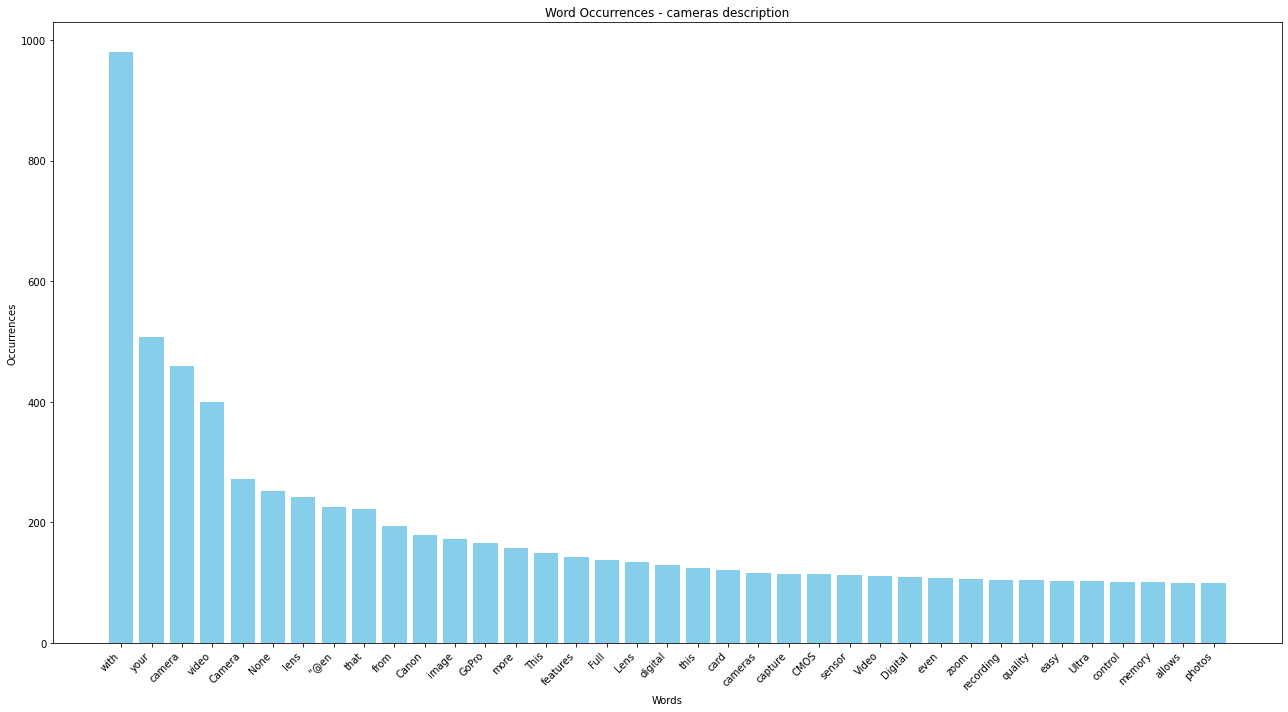

In [29]:
plot_occurences_in_description(merged_cam, 'cameras')


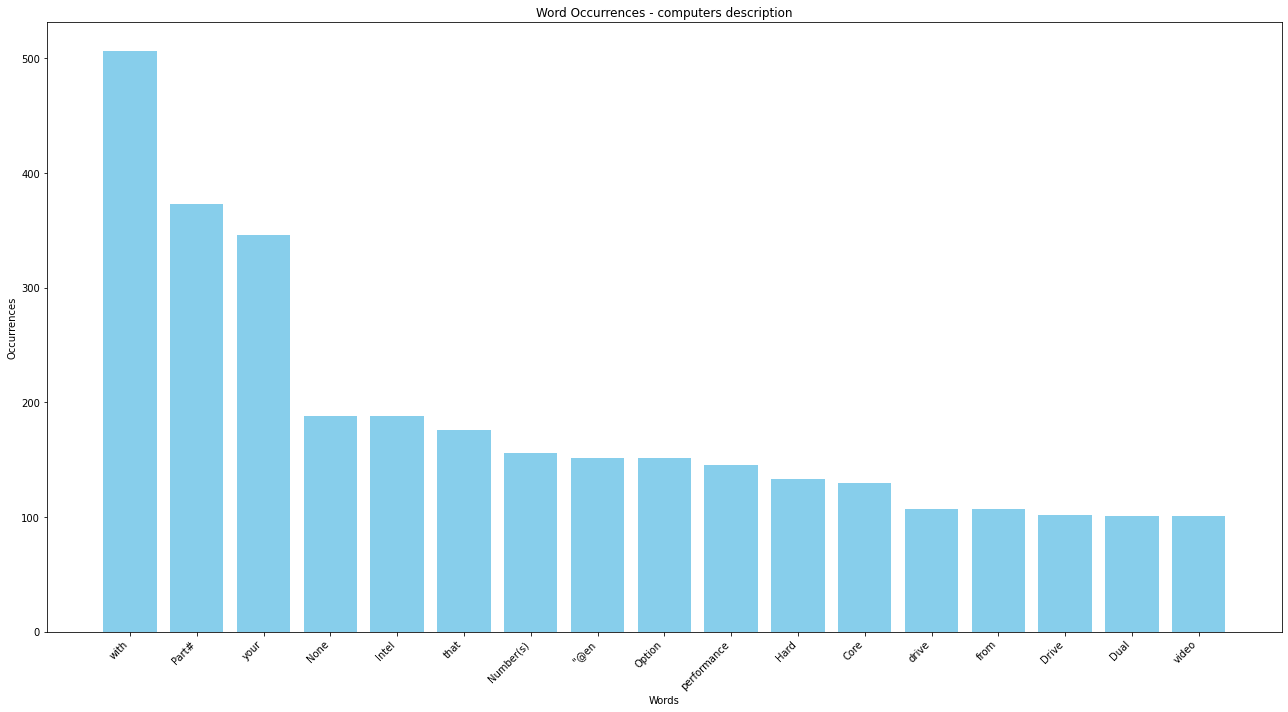

In [30]:
plot_occurences_in_description(merged_com, 'computers')


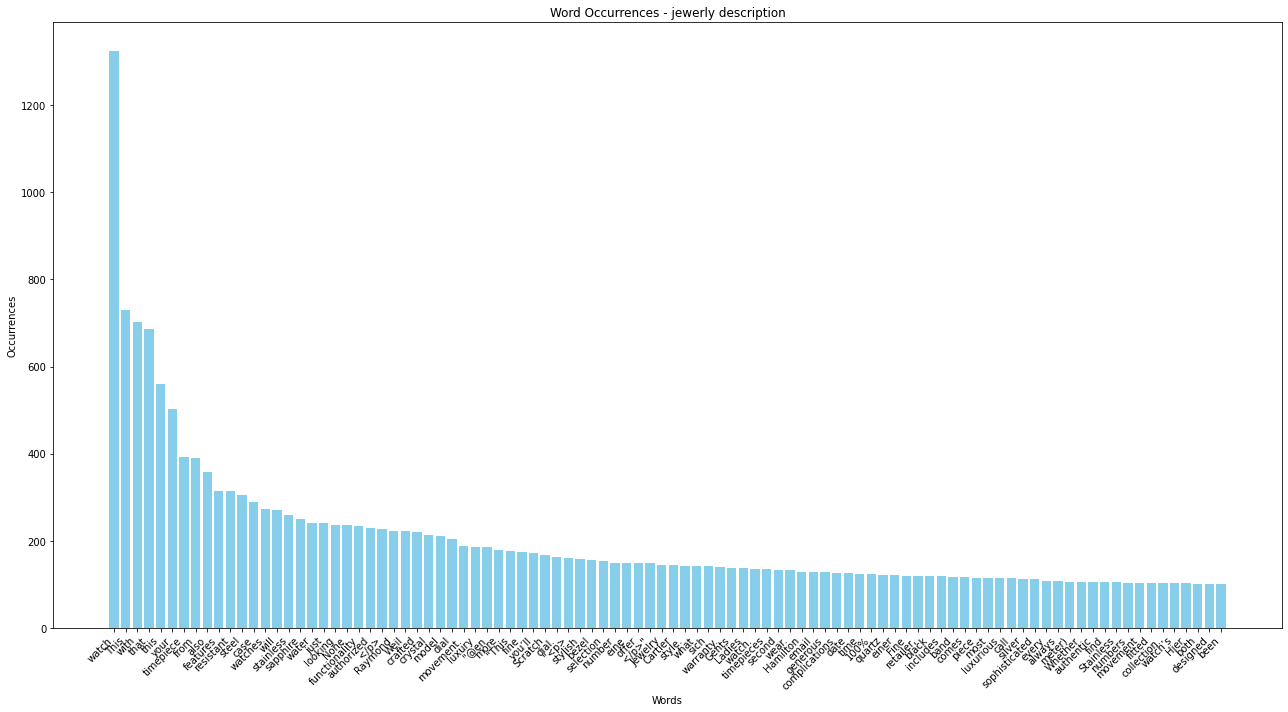

In [32]:
plot_occurences_in_description(merged_jew,  'jewerly')


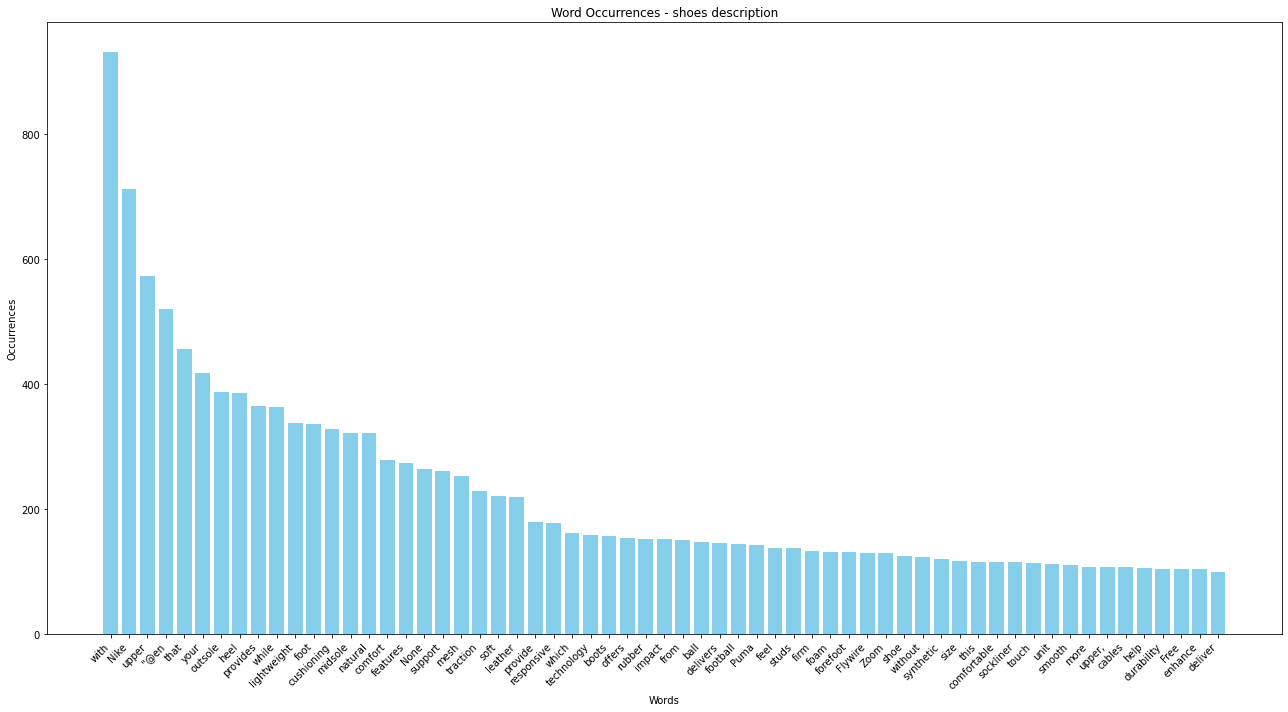

In [33]:
plot_occurences_in_description(merged_sh, 'shoes')


# Pairs analysis

Now we are back to analysing the products in pairs - just like in the original dataset.

In [34]:
# Function to calculate word overlap percentage
def word_overlap_percentage(row, column='title'):
    if row[f'{column}_left'] is None or row[f'{column}_right'] is None:
        overlap_percentage = None
    else:
        words_left = set(row[f'{column}_left'].split())
        words_right = set(row[f'{column}_right'].split())
        if len(words_left.union(words_right)) > 0 :
            overlap_percentage = (len(words_left.intersection(words_right)) / len(words_left.union(words_right))) * 100
        else:
            overlap_percentage = None    
    return overlap_percentage

In [35]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == '1']
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='title')
df_0 = df[df['label'] == '0']
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='title')


### Percentage of words overlap in titles

To try to distinguish manualy (and also out of curiosity) between the similar and different products a metric of perecentage of words overlap was proposed. It is calucated by taking two texts and then calucating how much of them overlap (*intersection*) and dividing it by the size of a set created from both texts (*union*). 

Then the distribution of these values was ploted with differenting between labels (label=0 - Differenet products, label=1 - Similar products). This was done for products titles, descriptions and table content.

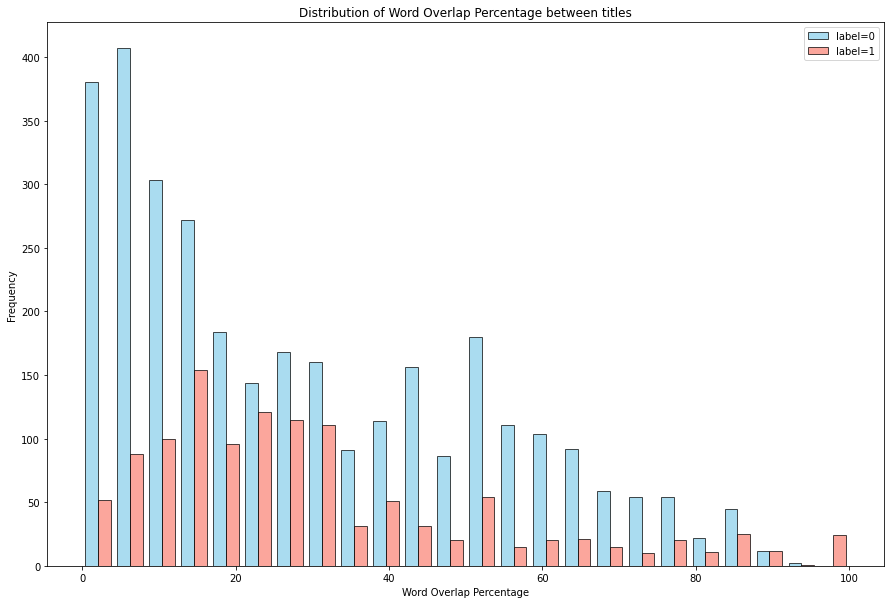

In [36]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['label=0', 'label=1'])

plt.xlabel('Word Overlap Percentage')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title('Distribution of Word Overlap Percentage between titles')

plt.show()

### Percentage of words overlap in descriptions

In [37]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == '1']
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='description')
overlap_1 = [i for i in overlap_1 if i is not None]

df_0 = df[df['label'] == '0']
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='description')
overlap_0 = [i for i in overlap_0 if i is not None]


### Percentage of words overlap in descriptions

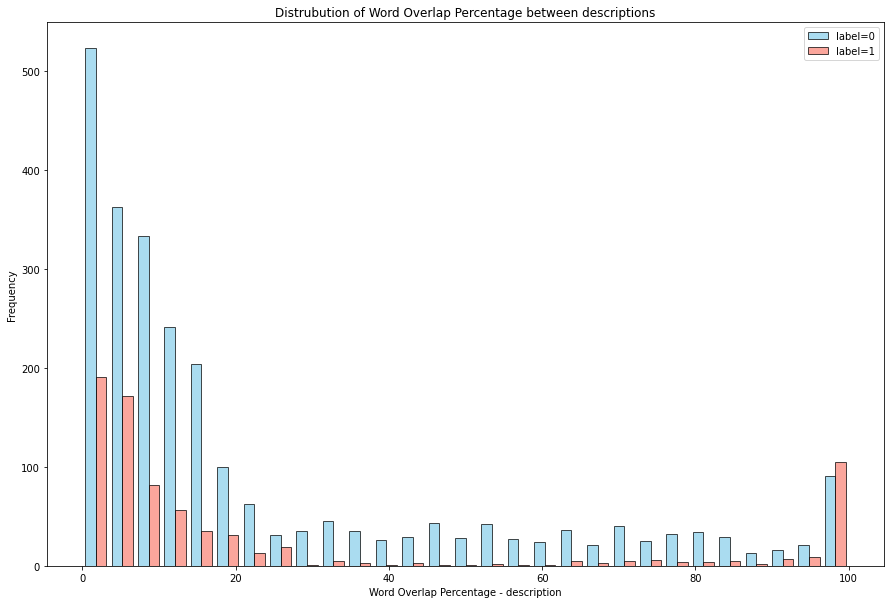

In [38]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['label=0', 'label=1'])

plt.xlabel('Word Overlap Percentage - description')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title('Distrubution of Word Overlap Percentage between descriptions')

plt.show()